In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'
!kaggle datasets download -d abhia1999/chronic-kidney-disease
!unzip \*.zip && rm *.zip

  0% 0.00/5.61k [00:00<?, ?B/s]
100% 5.61k/5.61k [00:00<00:00, 5.73MB/s]
Archive:  chronic-kidney-disease.zip
  inflating: new_model.csv           


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Load Data
data = pd.read_csv('/content/new_model.csv')  # Replace '/path/to/your/dataset.csv' with the actual path

# Step 2: Prepare Data
X = data[['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo']]
y = data['Class']  # Assuming 'Target' is the target variable name

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define a function to calculate the number of neighbors (k) adaptively for each test instance
def local_adaptive_k(X_train, x_test, radius):
    distances = np.linalg.norm(X_train - x_test, axis=1)
    neighbors_within_radius = np.sum(distances <= radius)
    return max(1, neighbors_within_radius)  # Ensure at least 1 neighbor

# Step 6: Train and Evaluate the LAKNN model
radius = 1.0  # Radius for local density estimation
y_pred = []
for x_test in X_test_scaled:
    k = local_adaptive_k(X_train_scaled, x_test, radius)
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred.append(knn_model.predict([x_test])[0])

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.975
Precision: 0.9766666666666666
Recall: 0.975
F1 Score: 0.9751859364435429
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



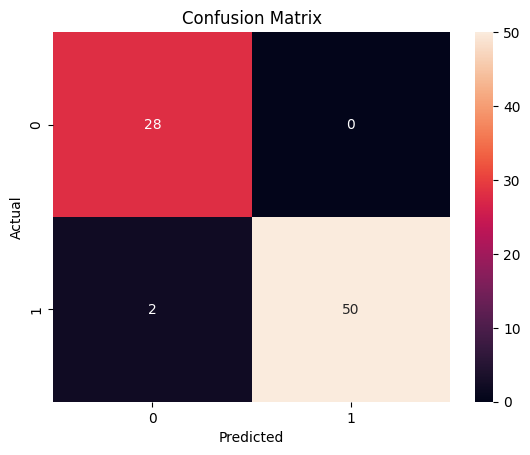

In [3]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.show()